# Import libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV# find optimal hyperparameters
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess data

In [18]:
df = pd.read_csv('mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [19]:
# split df to features and target variables
x = df.iloc[:, 0:8]
y = df.iloc[:, -1:]

In [20]:
# split data to train, valid and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [21]:
len(x_train), len(x_valid), len(x_test)

(32421, 10807, 10807)

# Baseline model

In [22]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_valid)

# using metrics module for accuracy calculation
print("BASELINE ACCURACY :", metrics.accuracy_score(y_valid, y_pred))


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


BASELINE ACCURACY : 0.9885259553992782


# Optimize model

In [26]:
# 1. Use grid search to find the best parameters

param_grid = { 
    'n_estimators': [60, 80, 100, 120], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [18, 21, 24, 25], 
} 

In [27]:

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

RandomForestClassifier(max_depth=24, n_estimators=80)


In [29]:
# update best parameters by Grid search
model_grid = RandomForestClassifier(max_depth=24, n_estimators=80) 
model_grid.fit(x_train, y_train) 
y_pred_grid = model_grid.predict(x_valid) 
print("ACCURACY :", metrics.accuracy_score(y_valid, y_pred_grid))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ACCURACY : 0.9895438141945035


In [10]:
# choose number of trees (n_estimators)
acc = []
for i in range(1, 11):
    model = RandomForestClassifier(n_estimators= 20 * i) # 20 40 60 ... 200
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_valid) 
    acc.append(metrics.accuracy_score(y_valid, y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

([<matplotlib.axis.XTick at 0x1e858be6c50>,
 [Text(2, 0, '40'),
  Text(4, 0, '80'),
  Text(6, 0, '120'),
  Text(8, 0, '160'),
  Text(10, 0, '200')])

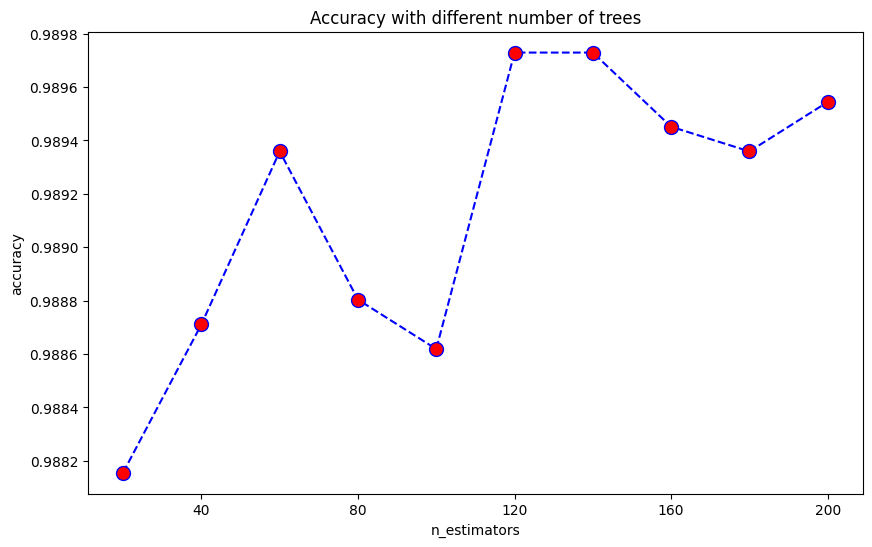

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), acc, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Accuracy with different number of trees')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks=(2, 4, 6, 8, 10), labels=(40, 80, 120, 160, 200))

In [12]:
print("Maximum accuracy : ", max(acc), " with n_estimators = ", (acc.index(max(acc)) + 1) * 20) 

Maximum accuracy :  0.9897288794299991  with n_estimators =  120


# Error Analysis

In [30]:
model = RandomForestClassifier(n_estimators= 120, max_depth=20)
model.fit(x_train, y_train) 
y_pred = model.predict(x_valid) 
print("accuracy: ", metrics.accuracy_score(y_valid, y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy:  0.9888960858702692


In [15]:
y_pred = model.predict(x_train)
print("Accuracy on train data: ", metrics.accuracy_score(y_train, y_pred))

Accuracy on train data:  1.0


In [8]:
y_valid['pred'] = y_pred.tolist()

In [9]:
# get all misclassified indices
y_valid_miss = y_valid[y_valid['class'] != y_valid['pred']]
y_valid_miss

,class,pred
39251,1,0
942,0,1
29659,1,0
245,1,0
24318,1,0
...,...,...
33861,0,1
9412,0,1
39083,1,0
19637,0,1


In [10]:
miss = pd.merge(x_valid, y_valid_miss, left_index=True, right_index=True)

In [23]:
x_valid.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000
mean,563.809660,4.005830,2.101138,7.286759,0.767679,1049.481262,8.419635,0.953893
std,358.409895,2.159061,2.222337,3.213346,0.649802,780.964825,3.274051,0.303885
min,2.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372
25%,286.000000,2.000000,0.000000,5.000000,0.278104,417.000000,6.000000,0.888450
50%,521.000000,5.000000,1.000000,7.000000,0.612339,928.000000,11.000000,0.943195
75%,776.500000,6.000000,4.000000,10.000000,1.066795,1523.000000,11.000000,0.943195
max,1885.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273


In [11]:
miss.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,pred
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,660.136752,4.735043,2.008547,9.042735,0.798583,1312.239316,10.034188,0.919332,0.478632,0.521368
std,285.620012,1.826024,2.617895,2.447353,0.636756,510.974654,2.542506,0.119749,0.501692,0.501692
min,130.000000,0.000000,0.000000,1.000000,0.007532,267.000000,1.000000,0.027372,0.000000,0.000000
25%,502.000000,2.000000,0.000000,10.000000,0.329830,1022.000000,11.000000,0.888450,0.000000,0.000000
50%,688.000000,6.000000,1.000000,10.000000,0.660086,1412.000000,11.000000,0.943195,0.000000,1.000000
75%,779.000000,6.000000,6.000000,10.000000,0.998301,1658.000000,11.000000,0.943195,1.000000,1.000000
max,1873.000000,6.000000,6.000000,11.000000,2.259640,2681.000000,11.000000,1.804273,1.000000,1.000000


Text(0.5, 0, 'gill-attachment')

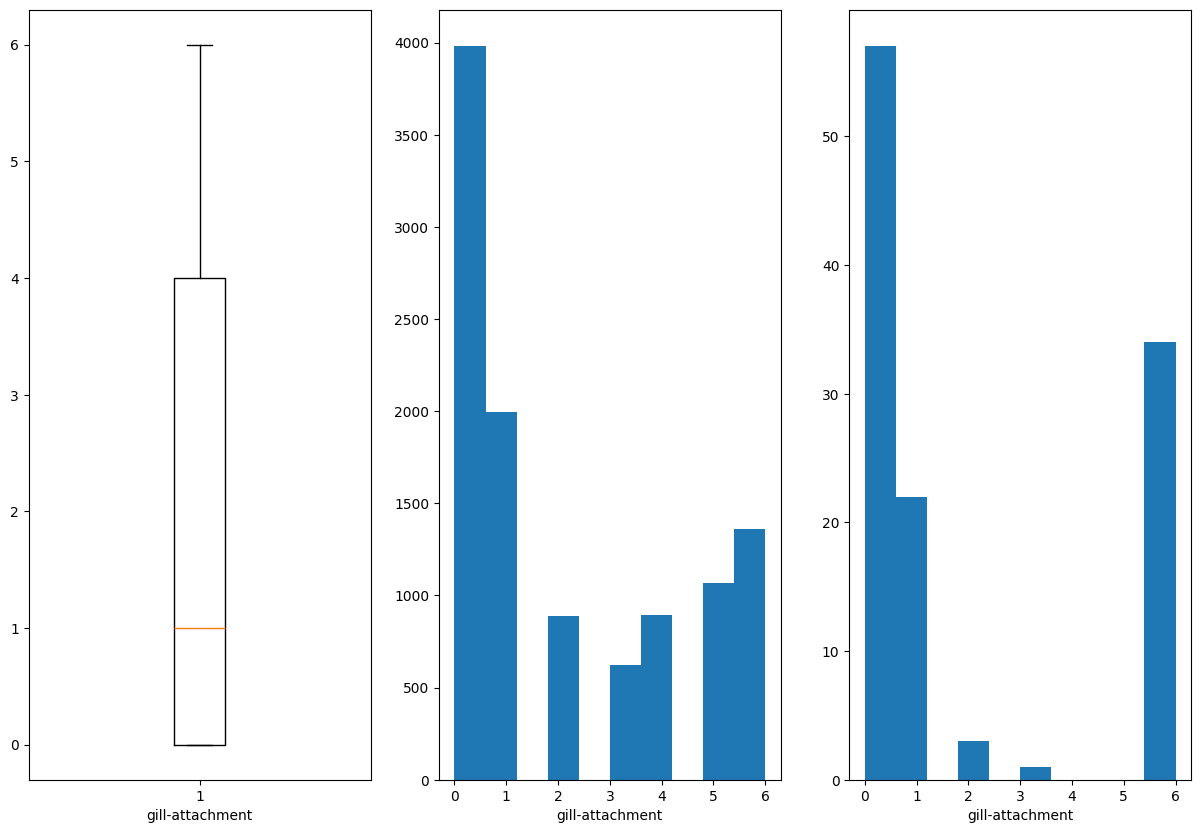

In [12]:
# gill-attachment: phan giua it false hon
# stem height: outlier false 

fig, axes = plt.subplots(1,3 , figsize=(15, 10))
axes[0].boxplot(data=x_valid, x = "gill-attachment")
axes[0].set_xlabel("gill-attachment")
axes[1].hist(data=x_valid, x = "gill-attachment")
axes[1].set_xlabel("gill-attachment")
axes[2].hist(data=miss, x = "gill-attachment")
axes[2].set_xlabel("gill-attachment")

In [76]:
# remove outlier 
from scipy import stats
df_clean = df[(np.abs(stats.zscore(df)) < 3.5).all(axis=1)]
len(df), len(df_clean)

(54035, 53448)

In [77]:
x = df_clean.iloc[:, 0:8]
y = df_clean.iloc[:, -1:]
# split data to train, valid and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [78]:
model = RandomForestClassifier(n_estimators= 120)
model.fit(x_train, y_train) 
y_pred = model.predict(x_valid) 
print("accuracy: ", metrics.accuracy_score(y_valid, y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


accuracy:  0.9886810102899907


# Train the model with the whole train data with the parameters that performs best on valid data 

In [31]:
x_train= pd.concat([x_train, x_valid])
y_train= pd.concat([y_train, y_valid])

In [32]:
len(x_train), len(x_test)

(43228, 10807)

In [35]:

model = RandomForestClassifier(n_estimators= 120, max_depth=24)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 
print("Final accuracy: ", metrics.accuracy_score(y_test, y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Final accuracy:  0.9913944665494587
